# Hackathon 2: Understanding superheroes' gender



### What is a hackathon?

A hackathon is an event designed to use technology, primarily coding, to accomplish an objective. In this case, we want to explain the output of a machine learning model using the LIME library.


<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

Superheroes have been in popular culture for a long time, and now more than ever. Since its creation, superheroes have not been very diverse, but this is changing rapidly. This dataset aims to provide an overview of heroes and their physical and power characteristics, helping curious people to identify trends and patterns. In this case, we want to understand how physical attributes and powers define superheroes' gender (Male, Female).

<u>Content</u>
    
The columns included in the dataset are: Id,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient.

Column names are self-explanatory. Physical attributes are numerical or categorical, while superpowers are dummy (Onehot) variables.
    
 <u>Inspiration</u>

What are the characteristics of your favorite superheroes? Are these characteristics affecting superheroes' gender? Let's put some light on this important business question.

 <u>URL</u>

https://raw.githubusercontent.com/jnin/information-systems/main/data/superheroes.csv
    
</div>

<div class="alert alert-info"><b>Task</b>
    
To this aim, load the dataset, understand the columns' meaning, preprocess it, create a non-linear classifier, preferably a neural network using sci-kit learn or a specialized library (keras, pytorch, ...), and finally use Lime to build up an explanation about the relationship between gender and the superheroes characteristics (physical and superpowers). You will observe there are 18 rows containing '-' as gender. Treat this value as you like (drop, infer, fill them by hand, etc.).
    
Remember to add comments to any decision you make. Provided comments help us to understand your code and evaluate your work correctly.

This time we will pay special attention to how you interpret results and which conclusions you draw from the analysis. Relate all your claims with concrete results from the study. Book some time to read Lime documentation and understand how it works.
       
</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Thursday, April 11th, 18:40

Do not over-complicate your code too much. Start with a simple working solution and refine it if you have time.
</div>

## 1. Importing dataset

First, transform all boolean variables into numerical ones so we make our life easier down the line, especially when calling and building the LIME function. Then, we split the dataframe into target variable and predictors. 

Moreover, we delete all rows that have "-" in column "Gender" to enable the LIME function in the end of this project.

In [99]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import set_config
set_config(transform_output="pandas")

df = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/superheroes.csv', index_col=0)
df = df[df['Gender'] != '-']
# Identify boolean columns
bool_cols = [col for col in df if df[col].dtype == bool]

# Convert boolean columns to integer
for col in bool_cols:
    df[col] = df[col].astype(int)

X = df.drop(columns = ['Gender'])
y = df['Gender']

---

# 2. Exploratory Data Analysis

First, get an overview about the data

In [100]:
pd.set_option('display.max_columns', None)
df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [101]:
print(X.info())	

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 0 to 659
Columns: 176 entries, name to Omniscient
dtypes: float64(2), int32(167), object(7)
memory usage: 469.0+ KB
None


First, we need to drop the ID column, called "Unnamed: 0" because it does not provide any value to the model

In [102]:
X = X.drop(columns = ['name'])

Show all columns of type "object". We are going to need that to onehot or ordinal encode these columns in the next stage

In [103]:
object_columns = X.select_dtypes(include=['object'])

for col in object_columns.columns:
    print(f"\nColumn Name: {col}")
    print(object_columns[col].value_counts())


Column Name: Eye color
Eye color
blue                       205
-                          124
brown                      117
green                       71
red                         40
black                       21
yellow                      18
white                       15
hazel                        6
grey                         5
purple                       4
gold                         3
amber                        2
violet                       2
yellow / blue                1
yellow (without irises)      1
indigo                       1
yellow / red                 1
white / red                  1
green / blue                 1
blue / white                 1
silver                       1
bown                         1
Name: count, dtype: int64

Column Name: Race
Race
-                     236
Human                 194
Mutant                 62
God / Eternal          12
Human / Radiation      11
Cyborg                 11
Android                 9
Symbiote             

We see the following categorical variables:
- 'Eye color': | Should be One-Hot encoded
- 'Race': | Should be One-Hot encoded
- 'Hair color': | Should be One-Hot encoded
- 'Publisher': | Should be One-Hot encoded
- 'Skin color': | Should be One-Hot encoded
- 'Alignment': | Should be One-Hot encoded

### Now check for **imbalance** in the target variable. \
If the target variable "Gender" is highly imbalanced, we should consider using resampling techniques like SMOTE or ADASYN, or using class weights in the model.

In [104]:
y.value_counts()

Gender
Male      464
Female    178
Name: count, dtype: int64

Our dataset seems not to be imbalanced. The ratio is around 70% to 30%. \
Thus, we are **not** going to use any measures against imbalanced datasets such as oversampling.

### Check for NA's in the data

In [18]:
X.isna().sum()

Eye color                 0
Race                      0
Hair color                0
Height                    0
Publisher                13
                         ..
Phoenix Force             0
Molecular Dissipation     0
Vision - Cryo             0
Omnipresent               0
Omniscient                0
Length: 175, dtype: int64

### Calculating correlation matrix of numerical variables

In [108]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr_matrix = numeric_data.corr()

Display the correlation matrix

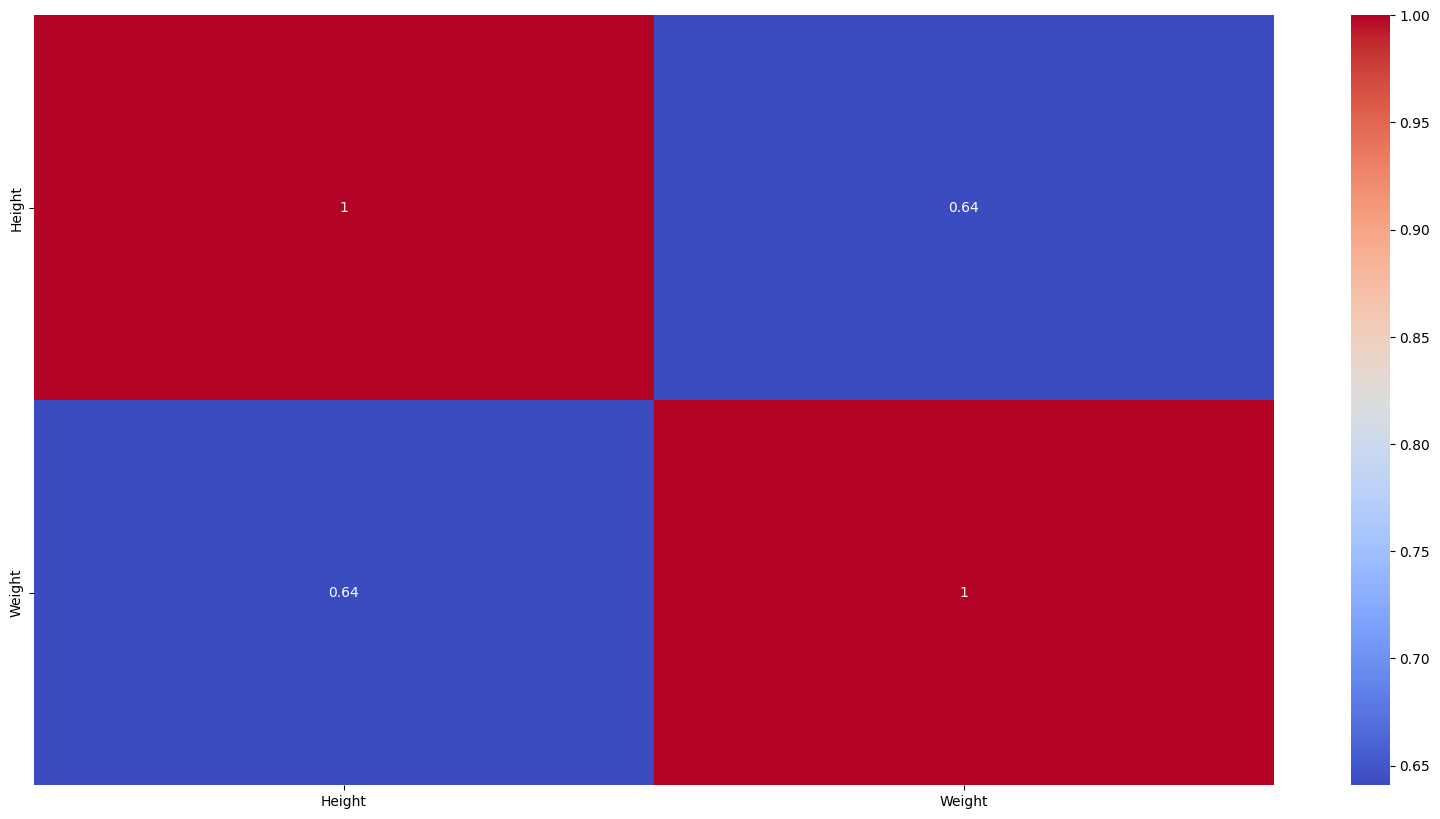

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation matrix is very small due to the fact that we only have two numerical variables. \
Height and weight are correlated, but we include them since the correlation is not very strong.

---

# 3. Preprocessing

Transform the target variable values if needed

In [105]:
# Transform y from Female/Male to 1/0
y = y.map({'Female': 1, 'Male': 0})

Build the preprocessing pipelines for numerical variables. Since we do not have any categorical variables left, we do not need to include them.

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Define the preprocessing for the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define the preprocessing for the categorical features
categorical_features = X.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

---

# 4. Model training, validation, and selection

## 4.1. Model: Neural Network (MLP Classifier)

### Create train/test split

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4.1.1. Train MLP Classifier and find optimal set of hyperparameters

We do not use GridSearch to ensure a more nuanced decision-making process to test out specific hyperparameter changes instead of brute-forcing our way to the best set of hyperparameters. Thus, we are going to efficiently utilize our exisiting knowledge about activation functions, solver methods and learning rates to optimize the gradient decent and finding the global minima. 

### Comparing two different solver functions

The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

pipeline_steps_sgd = [('preprocessor', preprocessor),
                      ('mlp_sgd', MLPClassifier(solver="sgd", 
                                                random_state=42, 
                                                max_iter=1000, 
                                                learning_rate = "constant", 
                                                hidden_layer_sizes=(5, 10, 5)))]
pipe_sgd = Pipeline(pipeline_steps_sgd)
pipe_sgd.fit(X_train, y_train)

pipeline_steps_adam = [('preprocessor', preprocessor),
                      ('mlp_sgd', MLPClassifier(solver="adam", 
                                                random_state=42, 
                                                max_iter=1000, 
                                                early_stopping = False,
                                                learning_rate = "constant", 
                                                hidden_layer_sizes=(5, 10, 5)))]

pipe_adam = Pipeline(pipeline_steps_adam)
pipe_adam.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Height', 'Weight'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Eye color', 'Race', 'Hair color', 'Publisher', 'Skin color',
       'Alignment'],
      dtype='object'))])),
                ('mlp_sgd',
                 MLPClassifier(hidden_layer_sizes=(5, 10, 5), max_iter=1000,
                               random_state=42))])

### Identifying the solver function with the better loss function

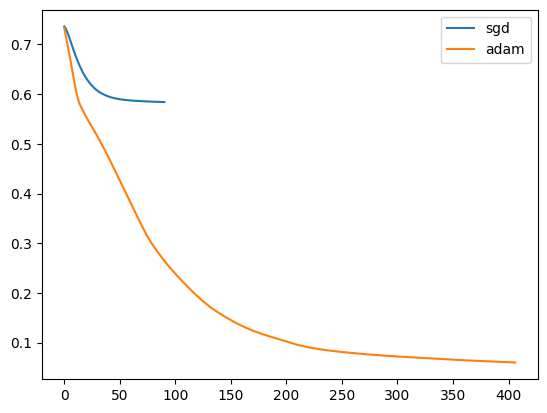

In [114]:
import matplotlib.pyplot as plt

plt.plot(pipe_sgd[1].loss_curve_, label = "sgd")
plt.plot(pipe_adam[1].loss_curve_, label = "adam")
plt.legend()
plt.show()

We can clearly see that the loss function with the solver function "adam", which refers to a stochastic gradient-based optimizer, decreases significantly faster than "sgd". It even reaches zero after 200 iterations, thus the graph is not visible anymore.

**Thus, we move forward with the "adam" solver function.**

### Finding optimal combination of activation function and number of layers & neurons with the solver "adam"

In [115]:
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

functions = ['logistic', 'relu']
num_hidden = [2,10]
num_neurons = [5, 30]

print('Neurons', "Activation Function", 'train_score', 'cross_val_score_mean')
for h,n,f in product(num_hidden,num_neurons,functions):
    pipeline_steps = [('preprocessor', preprocessor),
                      ('mlp_sgd', MLPClassifier(solver="adam",
                                                activation=f,
                                                random_state=42, 
                                                max_iter=1000, 
                                                learning_rate = "constant", 
                                                hidden_layer_sizes=[n]*h))]

    pipe = Pipeline(pipeline_steps)
    pipe.fit(X_train, y_train)
    train_score = round(pipe.score(X_train, y_train), 3)
    cross_val_scores = cross_val_score(pipe, X_train, y_train, cv=5)
    cross_val_score_mean = round(cross_val_scores.mean(), 3)
    print ([n]*h, f, train_score, cross_val_score_mean)

Neurons Activation Function train_score cross_val_score_mean


c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training

[5, 5] logistic 0.971 0.723


c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[5, 5] relu 1.0 0.709


c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[30, 30] logistic 1.0 0.694
[30, 30] relu 1.0 0.727
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5] logistic 0.727 0.727
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5] relu 0.727 0.719
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30] logistic 0.727 0.727
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30] relu 1.0 0.725


We see that the logistic activation function with the 10 hidden layers and 30 Neurons works best. The cross-validated score is 0.723.

**Thus, we move forward to build our MLPClassifier with activation function "logistic", solver function "adam", 10 hidden layers, and 30 Neurons.**

# Now let's train our MLPClassifier model that we are going to explain with LIME

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Specify the hyperparameters for your specific MLP classifier
activation_function = 'logistic'
num_hidden_layers = 10
num_neurons_per_layer = 30

print('Neurons', "Activation Function", 'train_score', 'cross_val_score_mean')

pipeline_steps = [('preprocessor', preprocessor),
                  ('mlp_adam', MLPClassifier(solver="adam",
                                            activation=activation_function,
                                            random_state=42, 
                                            max_iter=1000, 
                                            learning_rate = "constant", 
                                            hidden_layer_sizes=[num_neurons_per_layer]*num_hidden_layers))]

pipe = Pipeline(pipeline_steps)
pipe.fit(X_train, y_train)

cross_val_scores = cross_val_score(pipe, X_train, y_train, cv=5)
cross_val_score_mean = round(cross_val_scores.mean(), 3)

print ([num_neurons_per_layer]*num_hidden_layers, activation_function, train_score, cross_val_score_mean)

Neurons Activation Function train_score cross_val_score_mean


[30, 30, 30, 30, 30, 30, 30, 30, 30, 30] logistic 1.0 0.727


## Finally, let's do some model evaluation on the test set

In [158]:
# Compute the accuracy of the model on the test data
test_score = pipe.score(X_test, y_test)

print("Test score: ", test_score)

Test score:  0.7054263565891473


### The difference between test and train score is low and thus we can deduct that our model is not overfitting.

Thus, we can proceed without regularization methods, although we would have tried if we would have more time.

In [159]:
from sklearn.metrics import confusion_matrix

# Compute the predictions of the model on the test data
y_pred = pipe.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[91  0]
 [38  0]]


We see a lot of false negatives which is not perfect, but we proceed anyway due to time constraints.

## 4.3.2. Check for Overfitting and take measures to reduce it 

Due to time constraints, we did not do regularization.

### Using different regularization methods and compare their results
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py \
A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

---

# 5. Find understandable explanations for the relationships using LIME (To be edited)

### Create the explainer (Numerical only in this example)

## First, we need to preprocess the data so that the train and test set are in the required format for LIME

Info from LIME: As opposed to lime_text.TextExplainer, tabular explainers need a training set. The reason for this is because we compute statistics on each feature (column). If the feature is numerical, we compute the mean and std, and discretize it into quartiles. If the feature is categorical, we compute the frequency of each value. For this tutorial, we'll only look at numerical features.

In [136]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed
X_test_transformed.shape,X_train_transformed.shape


((129, 139), (513, 139))

In [131]:
import sklearn
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed.to_numpy(), 
    feature_names=X_train_transformed.columns, 
    class_names=[0,1], 
    discretize_continuous=False,
    mode='classification'
)

### Explaining an instance

Since this is a multi-class classification problem, we set the top_labels parameter, so that we only explain the top class.

In [160]:
i = np.random.randint(1, 130)
exp = explainer.explain_instance(X_test_transformed.iloc[i], pipe["mlp_adam"].predict_proba, num_features=20)

exp.show_in_notebook(show_table=True, show_all=False)

c:\Users\Simon.Han\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


## Interpretation:

### This concrete example:
- The MLP Model predicts with 73 likelihood that this instance is a "0", in our case a male.
- The feature that supports the prediction are "num_Weight", "cat_Race_-" and "cat_Alignment_good".
- The value 1.16 indicates the gradient/slope linear model that approximates the model at the vicinity of our randomly chosen instance X. Thus, this resembles the impact of that feature mathematically on the prediciton target.
- Despite many feature sshow an orange indication, supporting the prediction of a Female, the final prediciton is still pretty sure of a male. This indicates that the feature "num_Weight" has higher weight in the linear model.

### General:
Understanding the subtle connection between superhero traits and their alignment relies heavily on explanations. By utilizing Lime, we were able to gain understandings of this complex relationship through the examination of our model's forecasts. For example, our classifier provided probabilities showing the chance of a superhero being male or female. Lime's explanations helped us explore further the connection between alignment, a key trait, and different physical attributes and superpowers.

The examination of Lime uncovered convincing trends. For example, superheroes with particular physical characteristics, such as brown hair, from the human race and a specific height, tended to be bad. These results shed light on how superhero traits and their alignment interact, revealing the factors that impact a superhero's moral direction.

Let's show all features

In [161]:
exp.show_in_notebook(show_table=True, show_all=True)

## Main learnings and trail & error we did in building the LIME explainer:

1. Data Import: The data must be read into pandas dataframe with the right configuration so that after the ColumnTransformer a Pandas dataframe is returned. In my case, a numpy array was returned that caused errors.
2. Cleaning NaN: During this stage, the test data y still had NaN values. This caused problems, too, so we had to change that.
3. Preprocessing: Although we did preprocessing in the first place for the model training, we need to do it again for this stage because the X_train and X_test data is still unprocessed. Not doing this created errors since LIME only takes numerical values in the explainer
4. Calling explainer instance: Since we transformed the X_train data to a Pandas dataframe, we had to use iloc when calling the explainer instance. 

---

# 6. Business Case Explanation

As long as superheroes have been in the market, they have almost always been targeted at little boys. Seldom did we find a superhero whose main target was girls, as finding little girls who were interested in the diverse world of Superheroes was strange and sometimes judged. 

Usually, kids like superheroes because they represent both incredible powers and someone they could dream of becoming. Consequently, since superheroes were targeted at little boys, most superheroes were always men. 

However, in recent years, companies have discovered they were missing out on a great market by not targeting little girls as well. As a result, more and more female superheroes have appeared. 


As AC movie producers, we not only recognize the immense potential of female superheroes but also understand the crucial role of strong supernatural abilities and visually stunning effects in their success and popularity.

Therefore, our proposal is to conduct a comprehensive study on the different female superheroes and their most popular powers. This research will enable us to budget and perfect special effects in the coming years, ensuring we are fully prepared for a potential saga, including an appealing list of all-female superheroes.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

powers_list = ["Agility", "Accelerated Healing", "Lantern Power Ring", "Dimensional Awareness", 
    "Cold Resistance", "Durability", "Stealth", "Energy Absorption", "Flight", "Danger Sense", 
    "Underwater breathing", "Marksmanship", "Weapons Master", "Power Augmentation", 
    "Animal Attributes", "Longevity", "Intelligence", "Super Strength", "Cryokinesis", 
    "Telepathy", "Energy Armor", "Energy Blasts", "Duplication", "Size Changing", 
    "Density Control", "Stamina", "Astral Travel", "Audio Control", "Dexterity", "Omnitrix", 
    "Super Speed", "Possession", "Animal Oriented Powers", "Weapon-based Powers", 
    "Electrokinesis", "Darkforce Manipulation", "Death Touch", "Teleportation", 
    "Enhanced Senses", "Telekinesis", "Energy Beams", "Magic", "Hyperkinesis", "Jump", 
    "Clairvoyance", "Dimensional Travel", "Power Sense", "Shapeshifting", "Peak Human Condition", 
    "Immortality", "Camouflage", "Element Control", "Phasing", "Astral Projection", 
    "Electrical Transport", "Fire Control", "Projection", "Summoning", "Enhanced Memory", 
    "Reflexes", "Invulnerability", "Energy Constructs", "Force Fields", "Self-Sustenance", 
    "Anti-Gravity", "Empathy", "Power Nullifier", "Radiation Control", "Psionic Powers", 
    "Elasticity", "Substance Secretion", "Elemental Transmogrification", "Technopath/Cyberpath", 
    "Photographic Reflexes", "Seismic Power", "Animation", "Precognition", "Mind Control", 
    "Fire Resistance", "Power Absorption", "Enhanced Hearing", "Nova Force", "Insanity", 
    "Hypnokinesis", "Animal Control", "Natural Armor", "Intangibility", "Enhanced Sight", 
    "Molecular Manipulation", "Heat Generation", "Adaptation", "Gliding", "Power Suit", 
    "Mind Blast", "Probability Manipulation", "Gravity Control", "Regeneration", "Light Control", 
    "Echolocation", "Levitation", "Toxin and Disease Control", "Banish", "Energy Manipulation", 
    "Heat Resistance", "Natural Weapons", "Time Travel", "Enhanced Smell", "Illusions", 
    "Thirstokinesis", "Hair Manipulation", "Illumination", "Omnipotent", "Cloaking", 
    "Changing Armor", "Power Cosmic", "Biokinesis", "Water Control", "Radiation Immunity", 
    "Vision - Telescopic", "Toxin and Disease Resistance", "Spatial Awareness", "Energy Resistance", 
    "Telepathy Resistance", "Molecular Combustion", "Omnilingualism", "Portal Creation", 
    "Magnetism", "Mind Control Resistance", "Plant Control", "Sonar", "Sonic Scream", 
    "Time Manipulation", "Enhanced Touch", "Magic Resistance", "Invisibility", "Sub-Mariner", 
    "Radiation Absorption", "Intuitive aptitude", "Vision - Microscopic", "Melting", 
    "Wind Control", "Super Breath", "Wallcrawling", "Vision - Night", "Vision - Infrared", 
    "Grim Reaping", "Matter Absorption", "The Force", "Resurrection", "Terrakinesis", 
    "Vision - Heat", "Vitakinesis", "Radar Sense", "Qwardian Power Ring", "Weather Control", 
    "Vision - X-Ray", "Vision - Thermal", "Web Creation", "Reality Warping", "Odin Force", 
    "Symbiote Costume", "Speed Force", "Phoenix Force", "Molecular Dissipation", "Vision - Cryo", 
    "Omnipresent", "Omniscient"]

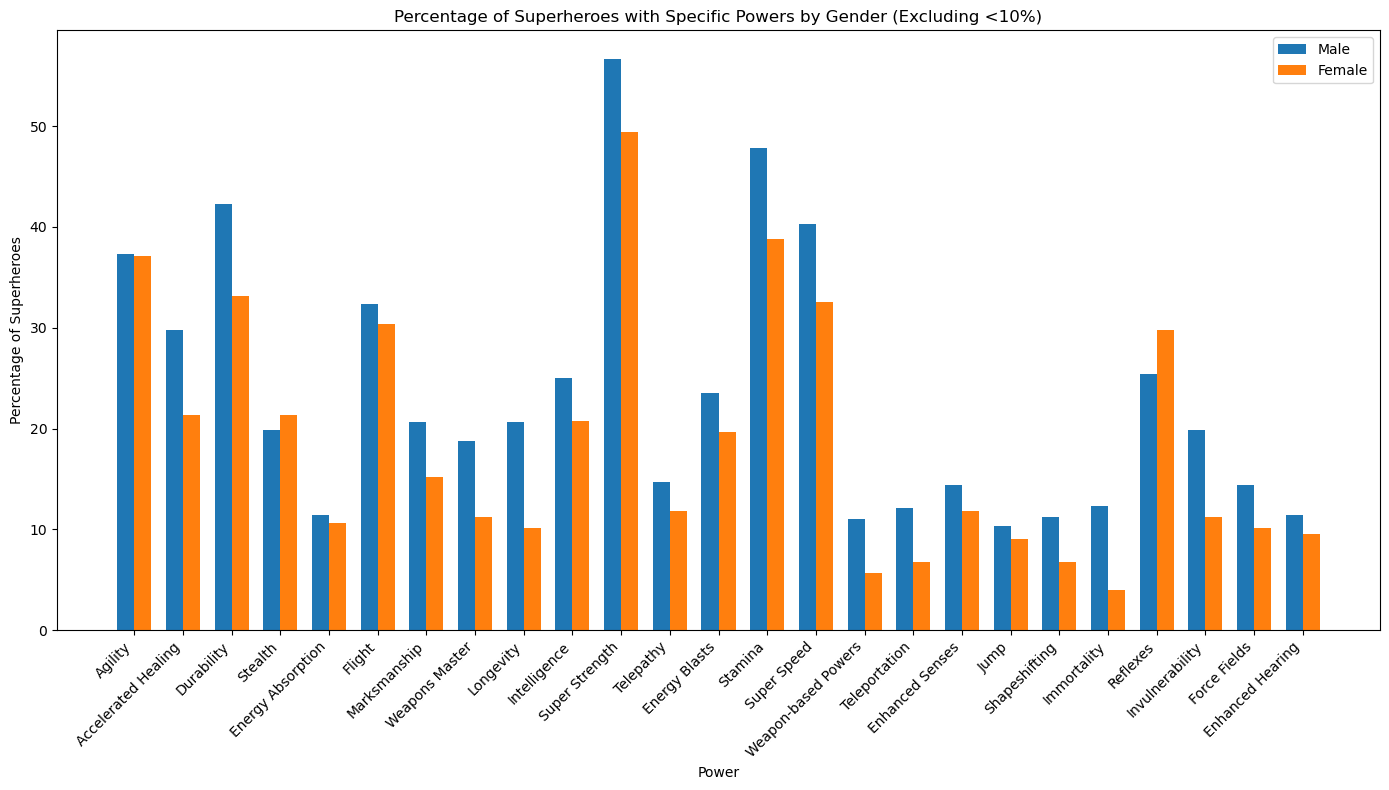

In [ ]:
power_percentages = pd.DataFrame(index=powers_list, columns=['Male', 'Female'])

# Total number of superheroes by gender
total_males = len(df[df['Gender'] == 'Male'])
total_females = len(df[df['Gender'] == 'Female'])

for power in powers_list:
    # Calculate percentage of males and females with this power
    male_count = df[(df['Gender'] == 'Male') & (df[power] == True)].shape[0]
    female_count = df[(df['Gender'] == 'Female') & (df[power] == True)].shape[0]
    
    power_percentages.loc[power, 'Male'] = (male_count / total_males) * 100
    power_percentages.loc[power, 'Female'] = (female_count / total_females) * 100

# Filter out powers with less than 10% representation among both male and female superheroes
power_percentages_filtered = power_percentages[(power_percentages['Male'] >= 10) | (power_percentages['Female'] >= 10)]

# Plotting
# Setting up the positions for the bars
bar_width = 0.35
index = np.arange(len(power_percentages_filtered))

fig, ax = plt.subplots(figsize=(14, 8))
male_bars = ax.bar(index - bar_width/2, power_percentages_filtered['Male'], bar_width, label='Male')
female_bars = ax.bar(index + bar_width/2, power_percentages_filtered['Female'], bar_width, label='Female')

ax.set_xlabel('Power')
ax.set_ylabel('Percentage of Superheroes')
ax.set_title('Percentage of Superheroes with Specific Powers by Gender (Excluding <10%)')
ax.set_xticks(index)
ax.set_xticklabels(power_percentages_filtered.index, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

Analyzing the most common super powers (>=10% of appearance for each gender) we find that male and female superheroes follow a similar trend per ach power. However, there is almost always a higher percentage of Male than Females except for two variables: Stealth and Reflexes. Which might be due to being considered more "Femenine" characteristics.

We considered that while many Male superheroes have similar traits, usally having many powers, Female superheores vary quite a bit from one another and are generally more focused on a particular attribute instead of many.

/var/folders/zj/4tpnhkpd67v3zyc78s35f_rh0000gn/T/ipykernel_7294/3641640210.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['true_count'] = data[superpowers].sum(axis=1)


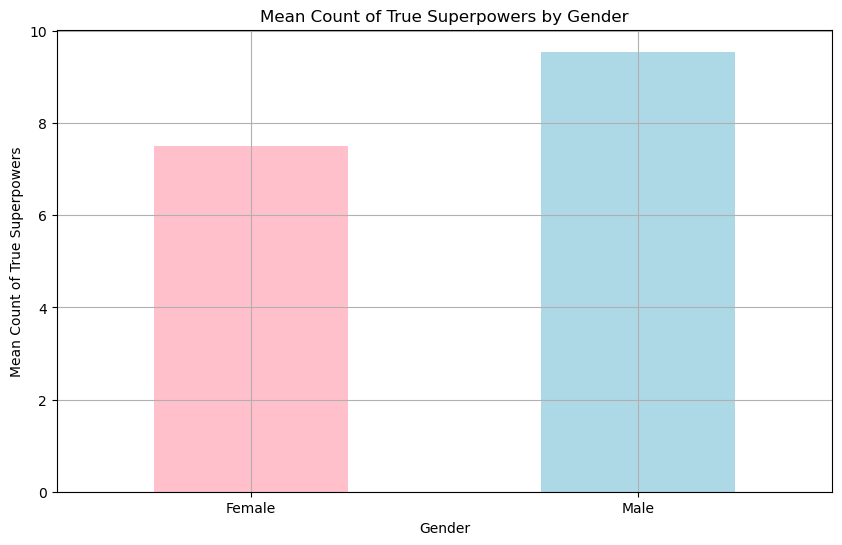

In [ ]:
# List of superpowers
superpowers = [
    "Agility", "Accelerated Healing", "Lantern Power Ring", "Dimensional Awareness", 
    "Cold Resistance", "Durability", "Stealth", "Energy Absorption", "Flight", "Danger Sense", 
    "Underwater breathing", "Marksmanship", "Weapons Master", "Power Augmentation", 
    "Animal Attributes", "Longevity", "Intelligence", "Super Strength", "Cryokinesis", 
    "Telepathy", "Energy Armor", "Energy Blasts", "Duplication", "Size Changing", 
    "Density Control", "Stamina", "Astral Travel", "Audio Control", "Dexterity", "Omnitrix", 
    "Super Speed", "Possession", "Animal Oriented Powers", "Weapon-based Powers", 
    "Electrokinesis", "Darkforce Manipulation", "Death Touch", "Teleportation", 
    "Enhanced Senses", "Telekinesis", "Energy Beams", "Magic", "Hyperkinesis", "Jump", 
    "Clairvoyance", "Dimensional Travel", "Power Sense", "Shapeshifting", "Peak Human Condition", 
    "Immortality", "Camouflage", "Element Control", "Phasing", "Astral Projection", 
    "Electrical Transport", "Fire Control", "Projection", "Summoning", "Enhanced Memory", 
    "Reflexes", "Invulnerability", "Energy Constructs", "Force Fields", "Self-Sustenance", 
    "Anti-Gravity", "Empathy", "Power Nullifier", "Radiation Control", "Psionic Powers", 
    "Elasticity", "Substance Secretion", "Elemental Transmogrification", "Technopath/Cyberpath", 
    "Photographic Reflexes", "Seismic Power", "Animation", "Precognition", "Mind Control", 
    "Fire Resistance", "Power Absorption", "Enhanced Hearing", "Nova Force", "Insanity", 
    "Hypnokinesis", "Animal Control", "Natural Armor", "Intangibility", "Enhanced Sight", 
    "Molecular Manipulation", "Heat Generation", "Adaptation", "Gliding", "Power Suit", 
    "Mind Blast", "Probability Manipulation", "Gravity Control", "Regeneration", "Light Control", 
    "Echolocation", "Levitation", "Toxin and Disease Control", "Banish", "Energy Manipulation", 
    "Heat Resistance", "Natural Weapons", "Time Travel", "Enhanced Smell", "Illusions", 
    "Thirstokinesis", "Hair Manipulation", "Illumination", "Omnipotent", "Cloaking", 
    "Changing Armor", "Power Cosmic", "Biokinesis", "Water Control", "Radiation Immunity", 
    "Vision - Telescopic", "Toxin and Disease Resistance", "Spatial Awareness", "Energy Resistance", 
    "Telepathy Resistance", "Molecular Combustion", "Omnilingualism", "Portal Creation", 
    "Magnetism", "Mind Control Resistance", "Plant Control", "Sonar", "Sonic Scream", 
    "Time Manipulation", "Enhanced Touch", "Magic Resistance", "Invisibility", "Sub-Mariner", 
    "Radiation Absorption", "Intuitive aptitude", "Vision - Microscopic", "Melting", 
    "Wind Control", "Super Breath", "Wallcrawling", "Vision - Night", "Vision - Infrared", 
    "Grim Reaping", "Matter Absorption", "The Force", "Resurrection", "Terrakinesis", 
    "Vision - Heat", "Vitakinesis", "Radar Sense", "Qwardian Power Ring", "Weather Control", 
    "Vision - X-Ray", "Vision - Thermal", "Web Creation", "Reality Warping", "Odin Force", 
    "Symbiote Costume", "Speed Force", "Phoenix Force", "Molecular Dissipation", "Vision - Cryo", 
    "Omnipresent", "Omniscient"
]
   

# Filter out non-gender specific entries
data = df[df['Gender'].isin(['Male', 'Female'])]

# Calculate the count of True values for each row, filtered by superpowers list
data['true_count'] = data[superpowers].sum(axis=1)

# Calculate the mean count of True values grouped by gender
mean_true_counts_by_gender = data.groupby('Gender')['true_count'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
mean_true_counts_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Mean Count of True Superpowers by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Count of True Superpowers')
plt.xticks(rotation=0)  # Keeps the gender labels horizontal
plt.grid(True)
plt.show()

We can observe that one man in mean has more powers than a woman in mean, having the female superheros arround 7.5 superpowers in avarage, and maan 9.54. This means that since woman have less powers the cost of production would be less intensive, giving the option to focus on the special effects.

In order to undrestand better the relationship between powers for female charcters we created a heatmap to visualize the strongest relationships

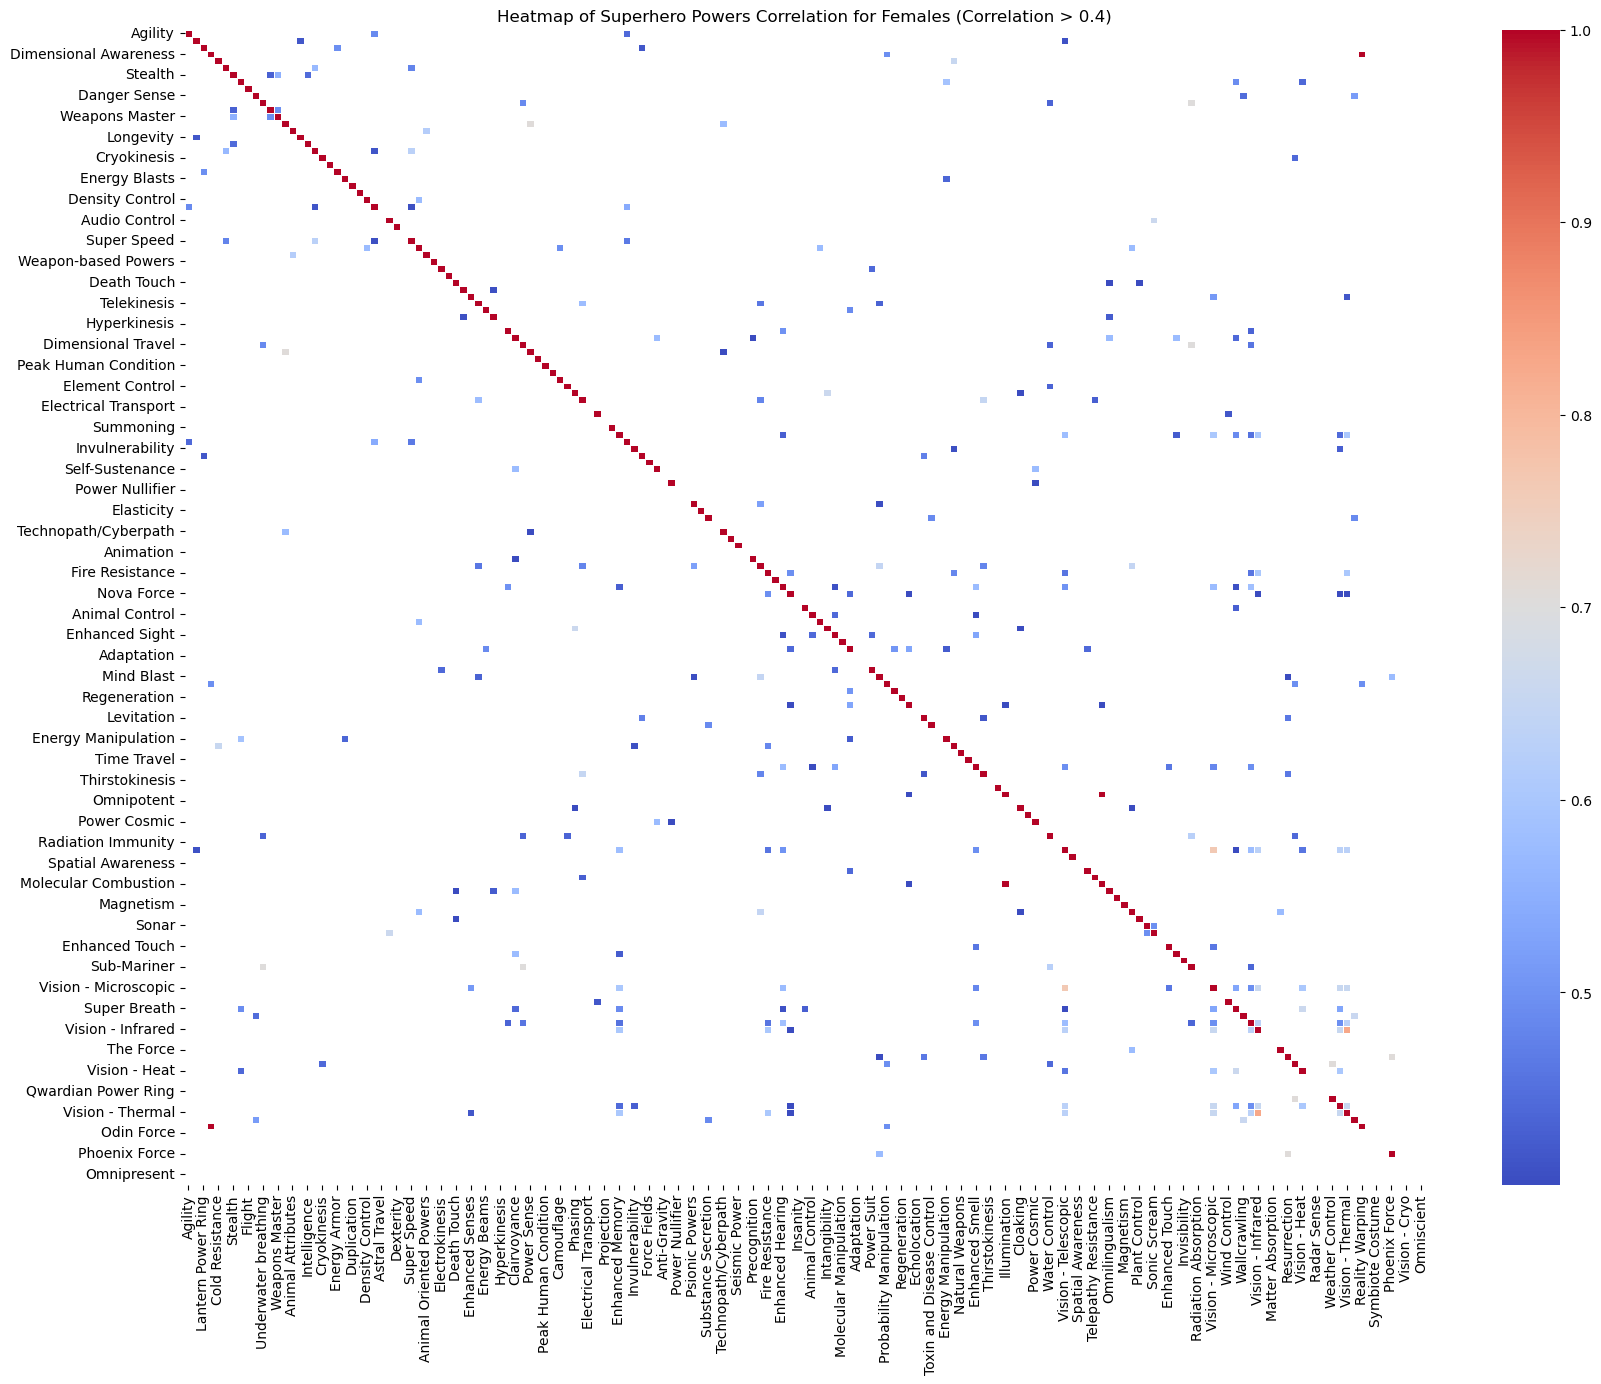

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Filter the DataFrame for female characters
females_df = df[df['Gender'] == 'Female']

# Select only the columns in powers_list from the filtered dataframe
powers_df = females_df[powers_list]

# Convert boolean values to integers (True = 1, False = 0)
powers_int_df = powers_df.astype(int)

# Calculate the correlation matrix for the powers
correlation_matrix = powers_int_df.corr()

# Set correlations less than or equal to 0.4 to NaN
filtered_corr_matrix = correlation_matrix.where(np.abs(correlation_matrix) > 0.4)

# Generate and display the heatmap
plt.figure(figsize=(20, 15))  # Adjust the size for better readability
sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5, mask=filtered_corr_matrix.isnull())
plt.title('Heatmap of Superhero Powers Correlation for Females (Correlation > 0.4)')
plt.show()